In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')
import random
# Random Initialization
random.seed(42)

In [2]:
train_df=pd.read_csv('C:/Users/20235153/Modeling & Simulation/mitbih_train.csv',header=None)
test_df=pd.read_csv('C:/Users/20235153/Modeling & Simulation/mitbih_test.csv',header=None)

In [3]:
print('Train Data Shape:', train_df.shape, '\nTest Data Shape:', test_df.shape)

Train Data Shape: (87554, 188) 
Test Data Shape: (21892, 188)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [6]:
categories_train = train_df[187].value_counts()

In [7]:
print(categories_train)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [8]:
categories_test = test_df[187].value_counts()
print(categories_test)

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [9]:
#change the label type from float to integer
train_df[187] = train_df[187].astype(int)
test_df[187] = test_df[187].astype(int)

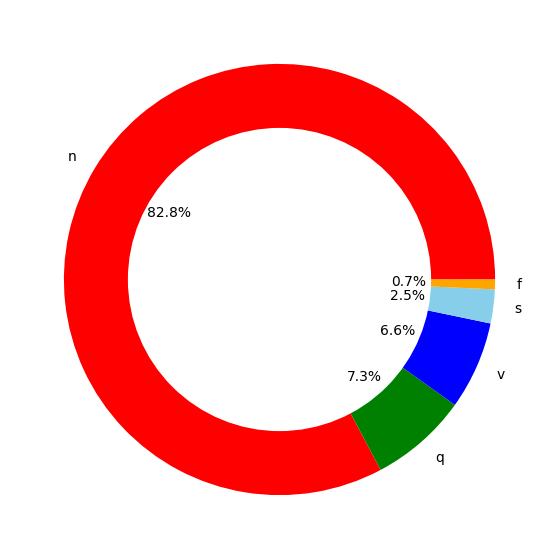

In [10]:
plt.figure(figsize=(10,7))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(categories_train, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Handling Data Imbalance

In [11]:
'''
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
'''

'\nfrom sklearn.utils import resample\ndf_1=train_df[train_df[187]==1]\ndf_2=train_df[train_df[187]==2]\ndf_3=train_df[train_df[187]==3]\ndf_4=train_df[train_df[187]==4]\ndf_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)\n\ndf_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)\ndf_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)\ndf_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)\ndf_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)\n\ntrain_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])\n'

In [12]:
#eq = train_df[187].value_counts()

In [13]:
'''
plt.figure(figsize=(10,7))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(eq, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
'''

"\nplt.figure(figsize=(10,7))\nmy_circle=plt.Circle( (0,0), 0.7, color='white')\nplt.pie(eq, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')\np=plt.gcf()\np.gca().add_artist(my_circle)\nplt.show()\n"

#### Make it Binary

In [14]:
train_df[187] = [1 if i > 0 else i for i in train_df[187]]
test_df[187] = [1 if i > 0 else i for i in test_df[187]]

In [15]:
categories_1 = train_df[187].value_counts()

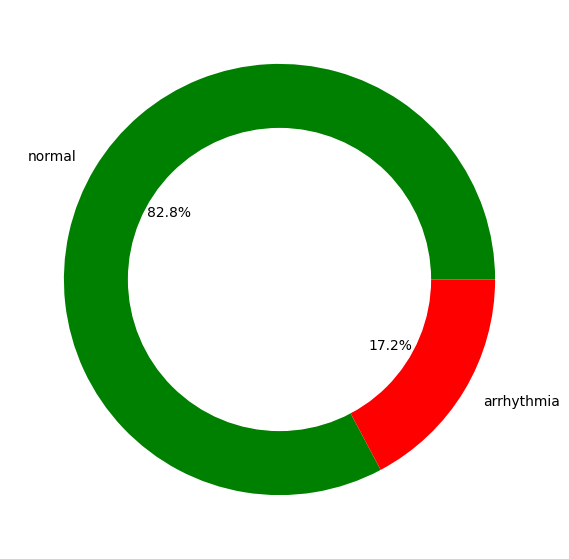

In [16]:
plt.figure(figsize=(10,7))
my_circle_1 =plt.Circle( (0,0), 0.7, color='white')
plt.pie(categories_1, labels=['normal','arrhythmia'], colors=['green','red'], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle_1)
plt.show()

#### Adding Noise

In [17]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

In [18]:
y_train=train_df[187]
y_test=test_df[187]

In [19]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

In [20]:
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

#### Balance Training Data with Weights

In [21]:
#from sklearn.utils.class_weight import compute_class_weight

In [22]:
#class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train.ravel()), y=y_train.ravel())

In [23]:
#class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

#### CNN Model

In [24]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(1, activation='sigmoid', name='main_output')(dense_end2)
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test), verbose=0)
    model.load_weights('best_model.h5')
    return(model,history)

In [25]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [26]:
import keras
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Accuracy: 93.12%


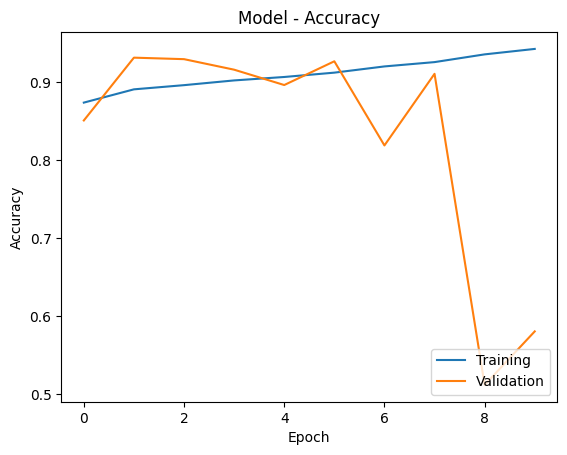

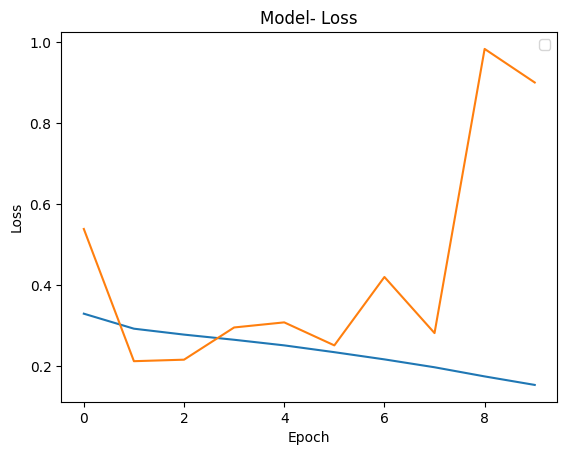

685/685 [==============================] - 3s 4ms/step


In [27]:
#evaluate_model(history,X_test,y_test,model)
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [28]:
'''
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
'''

'\nimport itertools\ndef plot_confusion_matrix(cm, classes,\n                          normalize=False,\n                          title=\'Confusion matrix\',\n                          cmap=plt.cm.Blues):\n    """\n    This function prints and plots the confusion matrix.\n    Normalization can be applied by setting `normalize=True`.\n    """\n    if normalize:\n        cm = cm.astype(\'float\') / cm.sum(axis=1)[:, np.newaxis]\n        print("Normalized confusion matrix")\n    else:\n        print(\'Confusion matrix, without normalization\')\n\n    plt.imshow(cm, interpolation=\'nearest\', cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation=45)\n    plt.yticks(tick_marks, classes)\n\n    fmt = \'.2f\' if normalize else \'d\'\n    thresh = cm.max() / 2.\n    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):\n        plt.text(j, i, format(cm[i, j], fmt),\n                 horizon

In [29]:
thresh = 0.5 #sum(y_train)/len(y_train)

In [30]:
threshpreds = y_pred > thresh

The f1 score for the testing data: 0.759993629558847


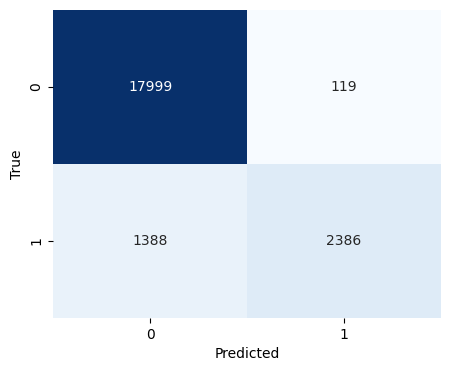

In [31]:
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, threshpreds)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
cf = confusion_matrix(y_test, threshpreds)
plt.figure(figsize = (5,4))
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Bootstrapping

In [32]:
def bootstrap(X, y, n_samples=20):
    models = []
    metrics = {"Precision": [], "Recall": [], "F1": []}
    sample_indices= []
 
    for i in range(n_samples):
        # Bootstrap resampling
        indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
        sample_indices.append(indices)
        X_sample = X.iloc[indices, :].values
        y_sample = y.loc[indices].values
 
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.33, random_state=42
        )

        for j in range(len(X_train)):
            X_train[j,:186]= add_gaussian_noise(X_train[j,:186])
        X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
        X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

        model,history=network(X_train,y_train,X_test,y_test)
 
        # Evaluate the model
        y_pred = model.predict(X_test)
        thresh = 0.5 #sum(y_train)/len(y_train) #or np.mean(y_train)  Compute threshold
        metrics["Precision"].append(precision_score(y_test, (y_pred > thresh), average="macro"))
        metrics["Recall"].append(recall_score(y_test, (y_pred > thresh), average="macro"))
        metrics["F1"].append(f1_score(y_test, (y_pred > thresh), average="macro"))
 
        # Save the trained model
        models.append(model)
 
    # Create a DataFrame to store results
    pred_df = pd.DataFrame({
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1": metrics["F1"],
        "Models": models,
        "Sample_indices": sample_indices,
    })
 
    return models, pred_df

In [33]:
models, pred_df = bootstrap(train_df.iloc[:,:186], train_df[187])

903/903 [==============================] - 4s 4ms/step


In [34]:
pred_df

,Precision,Recall,F1,Models,Sample_indices
0,0.939753,0.819696,0.864816,<keras.src.engine.functional.Functional object...,"[56261, 68578, 66317, 25409, 27682, 83626, 323..."
1,0.935511,0.822001,0.865531,<keras.src.engine.functional.Functional object...,"[78935, 82456, 70209, 11040, 11752, 70174, 616..."
2,0.909318,0.732548,0.784337,<keras.src.engine.functional.Functional object...,"[54467, 24083, 52078, 5292, 32923, 78826, 2695..."
3,0.913972,0.824472,0.860409,<keras.src.engine.functional.Functional object...,"[46817, 72929, 27650, 3128, 53762, 10919, 3263..."
4,0.925775,0.754979,0.808191,<keras.src.engine.functional.Functional object...,"[84830, 5847, 72274, 80744, 13749, 76425, 8427..."
5,0.903688,0.793538,0.834838,<keras.src.engine.functional.Functional object...,"[70567, 66235, 83221, 70798, 2743, 77834, 2162..."
6,0.823392,0.720364,0.755589,<keras.src.engine.functional.Functional object...,"[70870, 44884, 11899, 9252, 31355, 71771, 7922..."
7,0.869861,0.811250,0.836339,<keras.src.engine.functional.Functional object...,"[3536, 17407, 85919, 12872, 56551, 17470, 7211..."
8,0.859555,0.816102,0.835382,<keras.src.engine.functional.Functional object...,"[46871, 53151, 16725, 44842, 43996, 42894, 511..."
9,0.933228,0.768406,0.821579,<keras.src.engine.functional.Functional object...,"[72149, 38796, 13301, 21350, 79258, 18972, 746..."


In [35]:
pred_df['F1'].mean()

0.7964908083243071

In [36]:
# Confidence level
confidence_level = 95

# Calculating lower and upper percentiles based on confidence level
alpha = (100 - confidence_level) / 2
lower_percentile = np.percentile(pred_df['F1'], alpha)
upper_percentile = np.percentile(pred_df['F1'], 100 - alpha)

# Confidence interval
confidence_interval = (lower_percentile, upper_percentile)

print("Confidence interval:", confidence_interval)

Confidence interval: (0.675522283651776, 0.8651909547420272)
